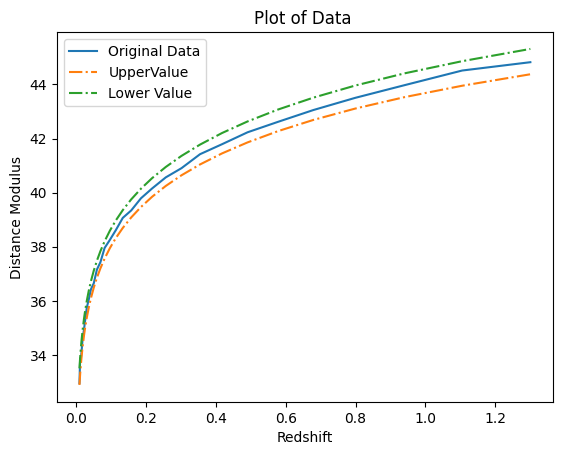

In [52]:
# Necessary Library
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as npl
#Constants
c = 3*10**8
size = 31 
sample = 10000

#Path of both data file
cov_m = os.path.abspath("D:\\Chrome Download\\jla_mub_covmatrix.txt")      
data_f = os.path.abspath("D:\\Chrome Download\\jla_mub_0.txt")

#Open and load the data
Cov = open(cov_m,'r')
data = open(data_f,'r')
data_r = np.loadtxt(data)
Cov_matrix = np.loadtxt(Cov)

z = data_r[:,0]           #Redshift
M = data_r[:,1]
c  = np.reshape(Cov_matrix,(size,size))
inv_Cov = npl.inv(c)           #Inverse of the covariance matrix


#Defining the eta function
def eta(a,om_m):
    s = (1.0/om_m - 1.0)**(1.0/3.0)
    n = 2.0*np.sqrt(s**3.0+1.0)*(1/a**4.0 - 0.1540*s/a**3.0+0.4304*s**2.0/a**2.0+0.19097*s**3.0/a+0.066941*s**4.0)**(-1.0/8.0)
    return n

def D_L(z,om_m):
    D = (3000.0*(1+z))*(eta(1,om_m)-eta(1/(1+z),om_m))
    return D

def mu(z,om_m,h):
    m =  25-(5*np.log10(h))+(5*np.log10(D_L(z,om_m)))
    return  m



# Ploting the value
plt.plot(z,M,label='Original Data')   #Given data value
plt.plot(z,mu(z,0.4,0.8),linestyle = 'dashdot',label = 'UpperValue')   #some guessed value
plt.plot(z,mu(z,0.2,0.6),linestyle = 'dashdot',label = 'Lower Value')  #some guesses value
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title('Plot of Data ')
plt.legend();

    

Value of omega matter : 0.28521108304391535
Value of h : 0.7207468780192944
Value of acceptance ratio : 36.06


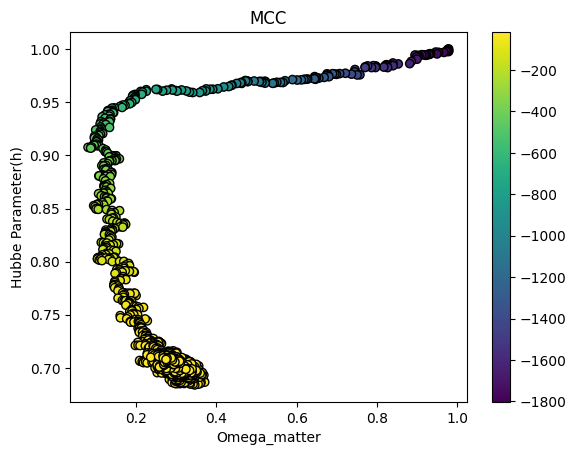

In [77]:
diff = np.empty(size) # diffrence of theoretical and observed values
std_om = 0.01
std_h = 0.001

# defining the likelihood value and correseponding  condition conditions
def likelihood(h,z,om_m,M):
    if om_m<= 0.0 or h <= 0.0 :
        l = -1.e100
    else:
        diff[:] = M - mu(z,om_m,h)
        dx = np.dot(inv_Cov,diff)
        L = -0.5*np.dot(diff,dx)         #Likelihood in log format
    return L

#MH-MCMC 
def MH_MCC(om_pro, h_pro):
    om_new = np.abs(om_pro + std_om*np.random.randn())
    h_new = np.abs(h_pro + std_h*np.random.randn())
# Likelihood becomes
    like_old = likelihood(h_pro,z,om_pro,M)
    like_new = likelihood(h_new,z,om_new,M)
    log_diff = (like_new - like_old)
    if np.log(np.random.normal(0.5,1)) < log_diff:
        return om_new,h_new ,True
    else:
        return om_pro,h_pro ,False


Omega = [1]    #Restoring the Estimated values
hubble = [1]
accept_rat = 0
ln_likelihood = []


for _ in range(1,sample):
    om_pro , h_pro = Omega[-1],hubble[-1]
    om_new , h_new, accepted = MH_MCC(om_pro,h_pro)
     
    if accepted:
        Omega.append(om_new)
        hubble.append(h_new)
        accept_rat += 1
        ln_likelihood.append(likelihood(h_new,z,om_new,M))

b = sample//200
Omega_mean = np.mean(Omega[b:])
hubble_mean = np.mean(hubble[b:])
Omega_std = np.std(Omega[b:])
hubble_std = np.std(hubble[b:])
accept_ratio = (accept_rat*100)/sample

print('Value of omega matter :', Omega_mean)
print('Value of h :', hubble_mean)
print('Value of acceptance ratio :', accept_ratio)  


plt.scatter(Omega[1:],hubble[1:], c = ln_likelihood,edgecolors='black')
plt.colorbar()
plt.xlabel('Omega_matter')
plt.ylabel('Hubbe Parameter(h)')
plt.title('MCC')
plt.show()     
    

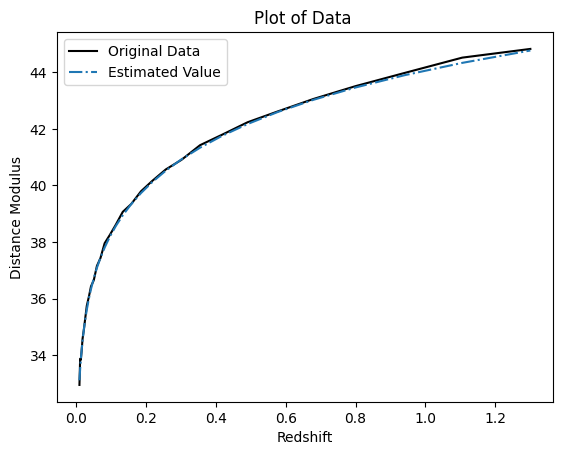

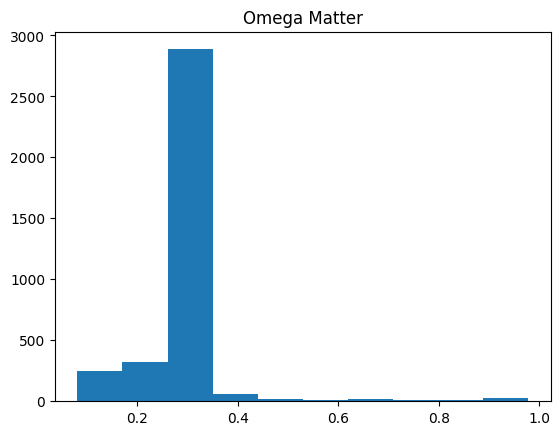

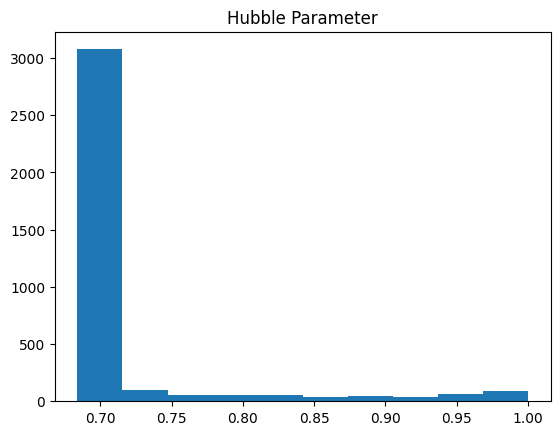

Covariance: 0.0012505907442764955
Variance Omega : 0.008425537659868225
Vairance Hubble : 0.004239433276420027


In [78]:
x_thero = np.empty(size)
for i in range(size):
    x_thero[i] = mu(z[i],Omega_mean,hubble_mean)

plt.plot(z,M,label='Original Data',c = 'black')
plt.plot(z,x_thero,linestyle = 'dashdot',label = 'Estimated Value')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title('Plot of Data ')
plt.legend();
plt.show(
)


plt.hist(Omega[1:])
plt.title('Omega Matter')
plt.show()



plt.hist(hubble[1:])
plt.title('Hubble Parameter')
plt.show()

# Covariance and variance 
variance_hubble = np.var(hubble[1:])
covar_omega = np.cov(Omega[1:],hubble[1:])[0,1]
variance_omega = np.var(Omega[1:])
print('Covariance:', covar_omega)
print('Variance Omega :', variance_omega)
print('Vairance Hubble :', variance_hubble)


Large Proposal distribtion

Value of omega matter : 0.2955543514535766
Value of h : 0.7024541322256507
Value of acceptance ratio : 1.46


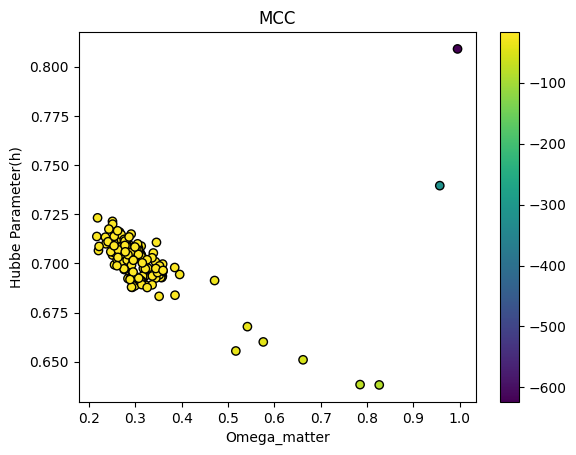

In [76]:
diff = np.empty(size) # diffrence of theoretical and observed values
std_om = 0.1
std_h = 0.1

# defining the likelihood value and correseponding  condition conditions
def likelihood(h,z,om_m,M):
    if om_m<= 0.0 or h <= 0.0 :
        l = -1.e100
    else:
        diff[:] = M - mu(z,om_m,h)
        dx = np.dot(inv_Cov,diff)
        L = -0.5*np.dot(diff,dx)         #Likelihood in log format
    return L

#MH-MCMC 
def MH_MCC(om_pro, h_pro):
    om_new = np.abs(om_pro + std_om*np.random.randn())
    h_new = np.abs(h_pro + std_h*np.random.randn())
# Likelihood becomes
    like_old = likelihood(h_pro,z,om_pro,M)
    like_new = likelihood(h_new,z,om_new,M)
    log_diff = (like_new - like_old)
    if np.log(np.random.normal(0.5,1)) < log_diff:
        return om_new,h_new ,True
    else:
        return om_pro,h_pro ,False


Omega = [1]    #Restoring the Estimated values
hubble = [1]
accept_rat = 0
ln_likelihood = []


for _ in range(1,sample):
    om_pro , h_pro = Omega[-1],hubble[-1]
    om_new , h_new, accepted = MH_MCC(om_pro,h_pro)
     
    if accepted:
        Omega.append(om_new)
        hubble.append(h_new)
        accept_rat += 1
        ln_likelihood.append(likelihood(h_new,z,om_new,M))

b = sample//200
Omega_mean = np.mean(Omega[b:])
hubble_mean = np.mean(hubble[b:])
Omega_std = np.std(Omega[b:])
hubble_std = np.std(hubble[b:])
accept_ratio = (accept_rat*100)/sample

print('Value of omega matter :', Omega_mean)
print('Value of h :', hubble_mean)
print('Value of acceptance ratio :', accept_ratio)  


plt.scatter(Omega[1:],hubble[1:], c = ln_likelihood,edgecolors='black')
plt.colorbar()
plt.xlabel('Omega_matter')
plt.ylabel('Hubbe Parameter(h)')
plt.title('MCC')
plt.show()     
    

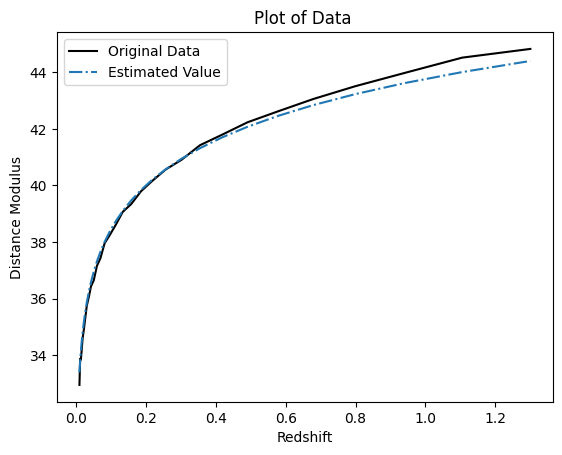

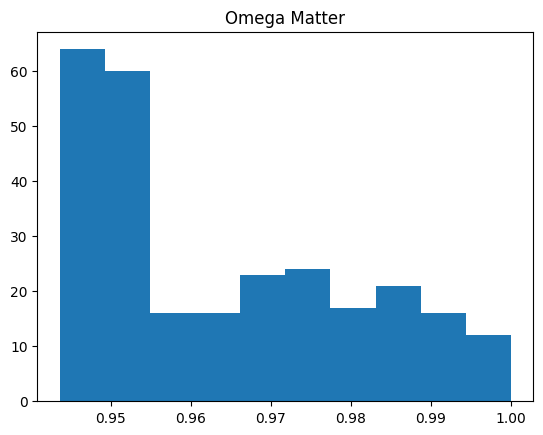

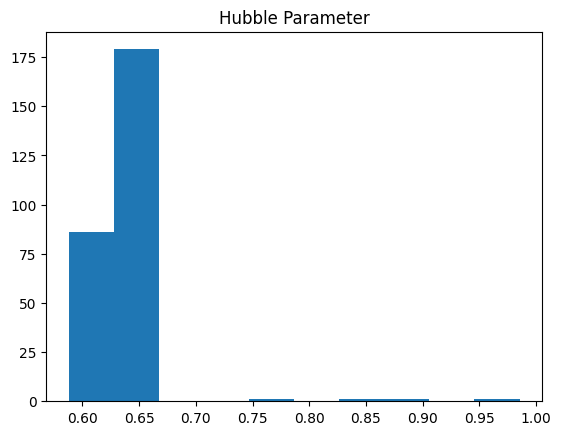

Covariance: 0.00011760711116542379
Variance Omega : 0.0002680796043138575
Vairance Hubble : 0.0009840134508148693


In [75]:
x_thero = np.empty(size)
for i in range(size):
    x_thero[i] = mu(z[i],Omega_mean,hubble_mean)

plt.plot(z,M,label='Original Data',c = 'black')
plt.plot(z,x_thero,linestyle = 'dashdot',label = 'Estimated Value')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title('Plot of Data ')
plt.legend();
plt.show(
)


plt.hist(Omega[1:])
plt.title('Omega Matter')
plt.show()



plt.hist(hubble[1:])
plt.title('Hubble Parameter')
plt.show()

# Covariance and variance 
variance_hubble = np.var(hubble[1:])
covar_omega = np.cov(Omega[1:],hubble[1:])[0,1]
variance_omega = np.var(Omega[1:])
print('Covariance:', covar_omega)
print('Variance Omega :', variance_omega)
print('Vairance Hubble :', variance_hubble)
